# GEQIE FRQI Example

## Setup

### Adding framework to Python path

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

### Imports

In [2]:
import numpy as np
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
import seaborn as sns

from qiskit.quantum_info import Statevector

import src.main as main
from src.encodings.frqi import data_function, init_function, map_function

## Encoding

In [3]:
image = Image.open("../test_4x4.png")
image = ImageOps.grayscale(image)
image = np.asarray(image) / 255.0
image

array([[1.        , 0.        , 1.        , 0.49803922],
       [1.        , 0.        , 0.        , 1.        ],
       [0.76470588, 1.        , 1.        , 1.        ],
       [1.        , 0.76470588, 0.        , 1.        ]])

In [4]:
circuit = main.encode(init_function, data_function, map_function, image, {"verbose": 0})
circuit.draw()

        »
   q_0: »
        »
   q_1: »
        »
   q_2: »
        »
   q_3: »
        »
   q_4: »
        »
meas: 5/»
        »
«        ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_1: ┤1                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_2: ┤2 Initialize(0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0) ├»
«        │                          

»
   q_0: »
        »
   q_1: »
        »
   q_2: »
        »
   q_3: »
        »
   q_4: »
        »
meas: 5/»
        »
«        ┌──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐»
«   q_0: ┤0                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_1: ┤1                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_2: ┤2 Initialize(0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0,0.25,0) ├»
«        │                                                                                                                              │»
«   q_3: ┤3                                                                                                                             ├»
«        │                                                                                                                              │»
«   q_4: ┤4                                                                                                                             ├»
«        └──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┘»
«meas: 5/════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════»
«                                                                                                                                        »
«        ┌──────────┐ ░ ┌─┐            
«   q_0: ┤0         ├─░─┤M├────────────
«        │          │ ░ └╥┘┌─┐         
«   q_1: ┤1         ├─░──╫─┤M├─────────
«        │          │ ░  ║ └╥┘┌─┐      
«   q_2: ┤2 Unitary ├─░──╫──╫─┤M├──────
«        │          │ ░  ║  ║ └╥┘┌─┐   
«   q_3: ┤3         ├─░──╫──╫──╫─┤M├───
«        │          │ ░  ║  ║  ║ └╥┘┌─┐
«   q_4: ┤4         ├─░──╫──╫──╫──╫─┤M├
«        └──────────┘ ░  ║  ║  ║  ║ └╥┘
«meas: 5/════════════════╩══╩══╩══╩══╩═
«                        0  1  2  3  4

<StemContainer object of 3 artists>

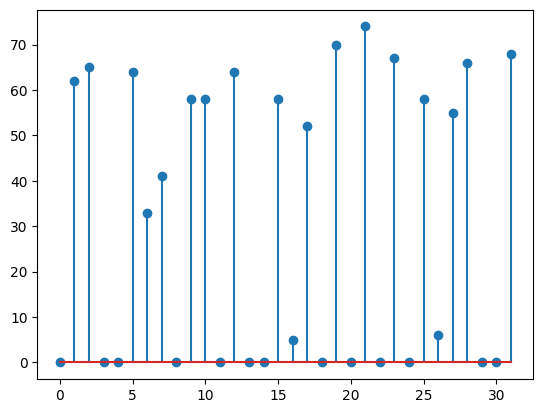

In [5]:
result = main.simulate(circuit, 1024)
plt.stem(result.values())

In [6]:
print(Statevector(circuit.remove_final_measurements(inplace=False)).data**2)

[0.        +0.j 0.0625    -0.j 0.0625    +0.j 0.        +0.j
 0.        +0.j 0.0625    -0.j 0.0314425 -0.j 0.0310575 -0.j
 0.        +0.j 0.0625    -0.j 0.0625    +0.j 0.        +0.j
 0.0625    +0.j 0.        +0.j 0.        +0.j 0.0625    -0.j
 0.00815597-0.j 0.05434403-0.j 0.        +0.j 0.0625    -0.j
 0.        +0.j 0.0625    -0.j 0.        +0.j 0.0625    -0.j
 0.        +0.j 0.0625    -0.j 0.00815597-0.j 0.05434403-0.j
 0.0625    +0.j 0.        +0.j 0.        +0.j 0.0625    -0.j]


In [7]:
ones = np.zeros_like(image)
total = np.zeros_like(image)

for state, n in result.items():
    b = state[:-1]
    c = state[-1]

    m = int(b, base=2)
    total.flat[m] += n
    if c == "1":
        ones.flat[m] += n
print(f"{ones=}")
print(f"{total=}")

ones=array([[62.,  0., 64., 41.],
       [58.,  0.,  0., 58.],
       [52., 70., 74., 67.],
       [58., 55.,  0., 68.]])
total=array([[62., 65., 64., 74.],
       [58., 58., 64., 58.],
       [57., 70., 74., 67.],
       [58., 61., 66., 68.]])


In [8]:
reconstructed = ones / total
reconstructed

array([[1.        , 0.        , 1.        , 0.55405405],
       [1.        , 0.        , 0.        , 1.        ],
       [0.9122807 , 1.        , 1.        , 1.        ],
       [1.        , 0.90163934, 0.        , 1.        ]])

<Axes: >

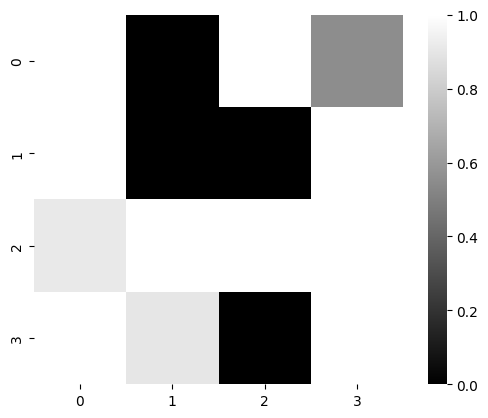

In [9]:
sns.heatmap(reconstructed, square=True, cmap="gray")